In [ ]:
# CONCENTRATION SUR LA CLASSE 2 PARCE QUE JE ME DISPERSE PARTOUT PARTOUT ET CA VA PAS DU TOUT
#CLASSE 2 ARBRE DE DECISION

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, neighbors,tree, ensemble, model_selection, preprocessing, metrics
from sklearn.model_selection import train_test_split


df = pd.read_csv('fulldata_colonnes_essentielles_prepross.csv')
df = df.drop(['Unnamed: 0','peak_int', 'ACCESSION'], 1) 
df.head()

,class1,class2,class3,AC_mode,ion_precursor_mz,num_peak,peak_mz,peak_rel_int
0,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,0,0.140564,0.122807,0.063692,0.002695
1,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,0,0.140564,0.122807,0.037912,0.008985
2,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,0,0.140564,0.122807,0.034229,0.089847
3,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,0,0.140564,0.122807,0.030329,0.053908
4,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,0,0.140564,0.122807,0.028596,0.013477


In [2]:
alcalo = df[(df.class1 == 'Alkaloid')]


In [4]:
alcalo['class3'].value_counts()

alcalo8 = alcalo[alcalo.class3 == 'Indole']
alcalo8

,class1,class2,class3,AC_mode,ion_precursor_mz,num_peak,peak_mz,peak_rel_int
2470,Alkaloid,Indole,Indole,0,0.071942,0.017544,0.040511,0.089847
2471,Alkaloid,Indole,Indole,0,0.071942,0.017544,0.030546,0.089847
2737,Alkaloid,Indole,Indole,0,0.127836,0.070175,0.058492,0.010782
2738,Alkaloid,Indole,Indole,0,0.127836,0.070175,0.055459,0.053908
2739,Alkaloid,Indole,Indole,0,0.127836,0.070175,0.055026,0.089847
2740,Alkaloid,Indole,Indole,0,0.127836,0.070175,0.045927,0.011680
2741,Alkaloid,Indole,Indole,0,0.127836,0.070175,0.030546,0.013477
2742,Alkaloid,Indole,Indole,0,0.127836,0.017544,0.058492,0.089847
2743,Alkaloid,Indole,Indole,0,0.127836,0.017544,0.055026,0.003594
5904,Alkaloid,Indole,Indole,1,0.046520,0.070175,0.030559,0.003594


In [45]:
alcalo_test_2 = alcalo.drop('ion_precursor_mz', 1)
alcalo_test_2.head()

,ACCESSION,class2,AC_mode,num_peak,peak_mz,peak_rel_int
258,PM000601,Bisindole,0,0.052632,0.097920,0.051213
259,PM000601,Bisindole,0,0.052632,0.094021,0.006289
260,PM000601,Bisindole,0,0.052632,0.084922,0.089847
261,PM000601,Bisindole,0,0.052632,0.039645,0.039533
262,PM000602,Bisindole,0,0.070175,0.091421,0.037736


In [46]:
print(alcalo_test_2.head(5))
print(alcalo_test_2.info())
print(alcalo_test_2.groupby('class2').describe())

    ACCESSION     class2  AC_mode  num_peak   peak_mz  peak_rel_int
258  PM000601  Bisindole        0  0.052632  0.097920      0.051213
259  PM000601  Bisindole        0  0.052632  0.094021      0.006289
260  PM000601  Bisindole        0  0.052632  0.084922      0.089847
261  PM000601  Bisindole        0  0.052632  0.039645      0.039533
262  PM000602  Bisindole        0  0.070175  0.091421      0.037736
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2103 entries, 258 to 44487
Data columns (total 6 columns):
ACCESSION       2103 non-null object
class2          2103 non-null object
AC_mode         2103 non-null int64
num_peak        2103 non-null float64
peak_mz         2103 non-null float64
peak_rel_int    2103 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 195.0+ KB
None
                    AC_mode                                               \
                      count      mean       std  min  25%  50%  75%  max   
class2                                

In [47]:
features = alcalo_test_2[['AC_mode', 'peak_mz', 'peak_rel_int', 'num_peak']]
target = alcalo_test_2['class2']

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target)

In [48]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

print('Score de dt class3:', clf_dt.score(X_test, y_test))
print('Score f1 de dt class3, param défault:', metrics.f1_score(y_test, y_pred_dt, average = 'micro'))

Score de dt class3: 0.6254752851711026
Score f1 de dt class3, param défault: 0.6254752851711026


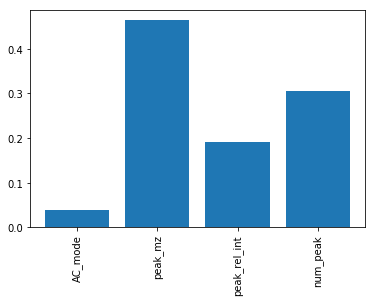

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline 


feature_names = ['AC_mode', 'peak_mz', 'peak_rel_int', 'num_peak']
importance = clf_dt.feature_importances_
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), feature_names, rotation = 90)
plt.show()

In [50]:
clf_dt = tree.DecisionTreeClassifier()

parametres_dt = {'criterion' : ['gini', 'entropy']}

grid_clf_dt = model_selection.GridSearchCV(estimator = clf_dt, param_grid = parametres_dt)

grille = grid_clf_dt.fit(X_train, y_train)

print('Meilleurs paramètres de dt:', grid_clf_dt.best_params_)

y_pred_dt = grid_clf_dt.predict(X_test)

print('Score de dt class2 param optimisés:', grid_clf_dt.score(X_test, y_test))
print('Score f1 de dt class2, param optimisés:', metrics.f1_score(y_test, y_pred_dt, average = 'micro'))

Meilleurs paramètres de dt: {'criterion': 'gini'}
Score de dt class2 param optimisés: 0.6349809885931559
Score f1 de dt class2, param optimisés: 0.6349809885931559


In [51]:
mc = pd.crosstab(y_test, y_pred_dt, rownames=['Classes réelles'], colnames=['Classes prédites'])
mc

Classes prédites,Amantadine,Benzophenanthridine,Benzylisoquinoline,Betalain,Bisindole,Diterpene,Ergot,Halmala,Imidazole,Indole,...,Nicotine,Papaverrubine,Phenylethylamine,Pilocarpine,Polyamine,Pyridine,Pyrrolizidine,Steroid,Tropane,Xanthine
Classes réelles,,,,,,,,,,,,,,,,,,,,,
Amantadine,7,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,2
Benzophenanthridine,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Benzylisoquinoline,0,0,30,0,0,3,0,0,2,2,...,0,0,0,0,4,0,0,0,2,1
Betalain,0,0,0,15,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Bisindole,0,0,0,1,2,2,0,0,0,0,...,0,1,0,0,1,1,0,2,0,0
Diterpene,0,0,3,2,1,16,0,0,0,1,...,0,1,0,0,0,0,0,6,0,0
Ergot,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Halmala,0,0,0,0,0,0,0,10,0,0,...,0,1,0,0,0,0,0,0,0,3
Imidazole,0,0,2,0,0,0,0,0,4,0,...,0,0,0,0,4,0,0,0,0,5
